<a href="https://colab.research.google.com/github/javalmo/MCD2024PROGRAMACION/blob/main/TareaAnalisisPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Seleccionar un conjunto de datos libres de la Secretaría de Salud en:

http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html

Entre los archivos que puedes utilizar se encuentra:

Exceso de Mortalidad
Egresos Hospitalarios
Muerte Materna
Nacimientos
Lesiones
Urgencias
Defunciones
Servicios Otorgados

Entre los detalles que tiene que tener tu libreta son:
Descarga los datos directamente con pandas, muestra el tipo de datos más importantes
y genera un indice con las fechas, usando una transformación a tipo timestamp.
Filtra los datos para un solo año y para un estado solamente (Sonora, por ejemplo)
Modifica los valores de variables cualitativas para que sean más representativas
en su análisis
Realiza un análisis exploratorio básico usando pandas,
haciendo algunas gráficas que muestren algunos detalles importantes o
interesantes y con algunas regrupaciones simples o complejas.
Escribir al final una reflexión de las cosas que se encontraron que se
consideran importantes o interesantes.

In [ ]:
Los datos seleccionados son registros de Mortalidad Materna de 2002 a 2022 en México.

Fuente: SS/DGIS, SINAC 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


In [ ]:
%pw

'/content'

In [111]:
mortalidad_materna_2002_2022_url = "https://raw.githubusercontent.com/javalmo/MCD2024PROGRAMACION/main/mortalidad_materna_2002_2022.csv"
local_mortalidad_filename = "datos/mortalidad_materna.csv"

df=pd.read_csv(mortalidad_materna_2002_2022_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23278 entries, 0 to 23277
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ANIO_NACIMIENTO            23278 non-null  int64 
 1   MES_NACIMIENTO             23278 non-null  int64 
 2   MES_NACIMIENTOD            23278 non-null  object
 3   DIA_NACIMIENTO             23278 non-null  int64 
 4   EDAD                       23278 non-null  int64 
 5   ESTADO_CONYUGAL            23278 non-null  int64 
 6   ESTADO_CONYUGALD           23278 non-null  object
 7   ENTIDAD_RESIDENCIA         23278 non-null  int64 
 8   ENTIDAD_RESIDENCIAD        23278 non-null  object
 9   MUNICIPIO_RESIDENCIA       23278 non-null  int64 
 10  MUNICIPIO_RESIDENCIAD      23278 non-null  object
 11  LOCALIDAD_RESIDENCIA       23278 non-null  int64 
 12  LOCALIDAD_RESIDENCIAD      23278 non-null  object
 13  TAMANIO_LOCALIDAD          23278 non-null  int64 
 14  TAMANI

In [117]:
#Agregando Timestamps para indicar fecha de nacimiento y de defunción
df['FECHA_NACIMIENTO'] = pd.to_datetime(df[['ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'DIA_NACIMIENTO']].astype(str).agg('-'.join, axis=1), errors='coerce')
df['FECHA_DEFUNCION'] = pd.to_datetime(df[['ANIO_DEFUNCION', 'MES_DEFUNCION', 'DIA_DEFUNCION']].astype(str).agg('-'.join, axis=1), errors='coerce')

dftime = df.drop(['ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'DIA_NACIMIENTO', 'ANIO_DEFUNCION', 'MES_DEFUNCION', 'DIA_DEFUNCION', 'MES_NACIMIENTOD'], axis=1)
dftime.head()

,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,MUNICIPIO_RESIDENCIAD,LOCALIDAD_RESIDENCIA,LOCALIDAD_RESIDENCIAD,TAMANIO_LOCALIDAD,...,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD,FECHA_NACIMIENTO,FECHA_DEFUNCION
0,35,1,SOLTERO,16,MICHOACÁN DE OCAMPO,104,VILLAMAR,24,NICOLÁS ROMERO,1,...,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años,1967-05-04,2002-07-11
1,37,5,CASADO,20,OAXACA,41,HUAUTLA DE JIMENEZ,12,SAN AGUSTÍN ZARAGOZA,1,...,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,6,35 a 39 años,NaT,2002-07-08
2,46,5,CASADO,12,GUERRERO,1,ACAPULCO DE JUAREZ,153,SAN ISIDRO GALLINERO (EL GALLINERO),2,...,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,8,45 a 49 años,1956-02-04,2002-08-01
3,22,5,CASADO,28,TAMAULIPAS,38,TAMPICO,1,TAMPICO,14,...,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,3,20 a 24 años,1980-09-03,2002-10-13
4,54,5,CASADO,27,TABASCO,3,CENTLA,22,EMILIANO ZAPATA,1,...,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,9,50 a 54 años,1947-12-20,2002-03-22


In [127]:
#Filtra los datos para un solo año y para un estado solamente (Sonora, por ejemplo)


df_SONANIO = dftime[(dftime.ENTIDAD_RESIDENCIAD == 'SONORA') & (dftime.ANIO_BASE_DATOS == 2011)]
df_SONANIO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 11190 to 12195
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EDAD                       26 non-null     int64         
 1   ESTADO_CONYUGAL            26 non-null     int64         
 2   ESTADO_CONYUGALD           26 non-null     object        
 3   ENTIDAD_RESIDENCIA         26 non-null     int64         
 4   ENTIDAD_RESIDENCIAD        26 non-null     object        
 5   MUNICIPIO_RESIDENCIA       26 non-null     int64         
 6   MUNICIPIO_RESIDENCIAD      26 non-null     object        
 7   LOCALIDAD_RESIDENCIA       26 non-null     int64         
 8   LOCALIDAD_RESIDENCIAD      26 non-null     object        
 9   TAMANIO_LOCALIDAD          26 non-null     int64         
 10  TAMANIO_LOCALIDADD         26 non-null     object        
 11  OCUPACION_HABITUAL         26 non-null     int64         
 12  OCUPACIO

In [128]:
df_SONANIO.head()

,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,MUNICIPIO_RESIDENCIA,MUNICIPIO_RESIDENCIAD,LOCALIDAD_RESIDENCIA,LOCALIDAD_RESIDENCIAD,TAMANIO_LOCALIDAD,...,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD,FECHA_NACIMIENTO,FECHA_DEFUNCION
11190,28,5,CASADO,26,SONORA,29,GUAYMAS,325,VÍCAM (SWITCH),5,...,5,MAYO,9,2011,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,NaT,2011-05-09
11191,24,4,UNION LIBRE,26,SONORA,3,ALAMOS,145,EL MAQUIPO,1,...,9,SEPTIEMBRE,6,2011,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años,1987-08-23,2011-09-06
11202,26,4,UNION LIBRE,26,SONORA,30,HERMOSILLO,1,HERMOSILLO,15,...,6,JUNIO,23,2011,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,4,25 a 29 años,NaT,2011-06-23
11239,37,4,UNION LIBRE,26,SONORA,56,SAN MIGUEL DE HORCASITAS,27,PESQUEIRA,5,...,3,MARZO,15,2011,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,6,35 a 39 años,NaT,2011-03-15
11312,28,5,CASADO,26,SONORA,62,SUAQUI GRANDE,1,SUAQUI GRANDE,2,...,5,MAYO,7,2011,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años,1983-01-07,2011-05-07


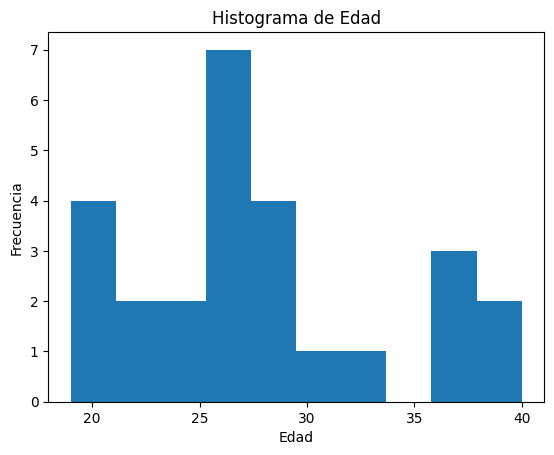

Edad de las mujeres que murieron posparto en SONORA en 2011


In [153]:
#Realiza un análisis exploratorio básico usando pandas,
#haciendo algunas gráficas que muestren algunos detalles importantes o
#interesantes y con algunas regrupaciones simples o complejas.


df_ANALISIS=df_SONANIO[['ESTADO_CONYUGALD', 'EDAD', 'MUNICIPIO_RESIDENCIAD', 'OCUPACION_HABITUALD','ESCOLARIDADD', 'CAUSA_CIE_4D']]
df_ANALISIS.head()
plt.hist(df_ANALISIS.EDAD, bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()
print("Edad de las mujeres que murieron posparto en SONORA en 2011")

In [143]:
print("La media de la edad de personas con mortalidad materna en SONORA el 2011 es de", df_ANALISIS.EDAD.mean(), 'años')
print("La mediana de la edad de personas con mortalidad materna en SONORA el 2011 es de", df_ANALISIS.EDAD.median(), 'años')
print("La moda de la edad de personas con mortalidad materna en SONORA el 2011 es de", df_ANALISIS.EDAD.mode(), 'años')

La media de la edad de personas con mortalidad materna en SONORA el 2011 es de 27.692307692307693 años
La mediana de la edad de personas con mortalidad materna en SONORA el 2011 es de 26.0 años
La moda de la edad de personas con mortalidad materna en SONORA el 2011 es de 0    26
Name: EDAD, dtype: int64 años


In [147]:
df_ANALISIS.groupby(["ESCOLARIDADD"])["EDAD"].mean()

ESCOLARIDADD
BACHILLERATO O PREPARATORIA COMPLETA    27.000000
NINGUNA                                 37.000000
PRIMARIA COMPLETA                       29.000000
PROFESIONAL                             31.000000
SECUNDARIA COMPLETA                     26.230769
SECUNDARIA INCOMPLETA                   28.000000
Name: EDAD, dtype: float64

In [150]:
df_ANALISIS.groupby(["CAUSA_CIE_4D"])["EDAD"].mean()

CAUSA_CIE_4D
O065  ABORTO NO ESPECIFICADO COMPLETO O NO ESPECIFICADO, COMPLICADO CON INFECCIÓN GENITAL Y PELVIANA                      22.00
O11X  TRASTORNOS HIPERTENSIVOS PREEXISTENTES, CON PROTEINURIA AGREGADA                                                    40.00
O13X  HIPERTENSIÓN GESTACIONAL [INDUCIDA POR EL EMBARAZO]                                                                 37.00
O141  PREECLAMPSIA SEVERA                                                                                                 36.00
O149  PREECLAMPSIA, NO ESPECIFICADA                                                                                       25.50
O269  COMPLICACIÓN RELACIONADA CON EL EMBARAZO, NO ESPECIFICADA                                                           27.00
O364  ATENCIÓN MATERNA POR MUERTE INTRAUTERINA                                                                            37.00
O712  INVERSIÓN DEL ÚTERO, POSTPARTO                                                       

En este análisis se observan los casos de muertes maternas en el estado de Sonora en el año 2011 y los diferentes motivos que lo ocasionaron como se observa en los datos analizados en este documento. Asi como la edad promedio en las que ocurrio la defunción organizado por diferentes causas.